In [ ]:
# Exponential Decay Curve Fitting  
# **Computational Physics Portfolio Project**  
# Fits noisy exponential decay data (e.g., radioactive count or cooling) using SciPy curve_fit  
# Includes parameter uncertainties, residual plot, and goodness-of-fit  
# High-demand skill for lab reports, research assistance, data analysis gigs

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# True parameters
N0_true = 100.0
lambda_true = 0.05  # decay constant
bg_true = 5.0       # background noise/counts

# Model function
def exp_decay(t, N0, lam, bg):
    return N0 * np.exp(-lam * t) + bg

# Generate synthetic "experimental" data with noise
np.random.seed(42)  # reproducible
t_data = np.linspace(0, 100, 50)  # time points
y_true = exp_decay(t_data, N0_true, lambda_true, bg_true)
noise = np.random.normal(0, 8, size=len(t_data))  # Gaussian noise ~8 counts
y_data = y_true + noise

# For realism: add increasing uncertainty
sigma_data = np.sqrt(np.maximum(y_data, 1))  # approx Poisson error

In [10]:
# Initial guess
p0 = [80.0, 0.03, 3.0]  # rough: N0 a bit low, lam slow, small bg

# Fit with uncertainties
popt, pcov = curve_fit(exp_decay, t_data, y_data, p0=p0, sigma=sigma_data, absolute_sigma=True)

# Extract results
N0_fit, lam_fit, bg_fit = popt
perr = np.sqrt(np.diag(pcov))  # 1-sigma uncertainties

print("Fitted parameters:")
print(f"N0 = {N0_fit:.2f} ± {perr[0]:.2f}")
print(f"λ  = {lam_fit:.4f} ± {perr[1]:.4f}")
print(f"bg = {bg_fit:.2f} ± {perr[2]:.2f}")

Fitted parameters:
N0 = 114.39 ± 4.85
λ  = 0.0492 ± 0.0023
bg = -3.88 ± 0.55


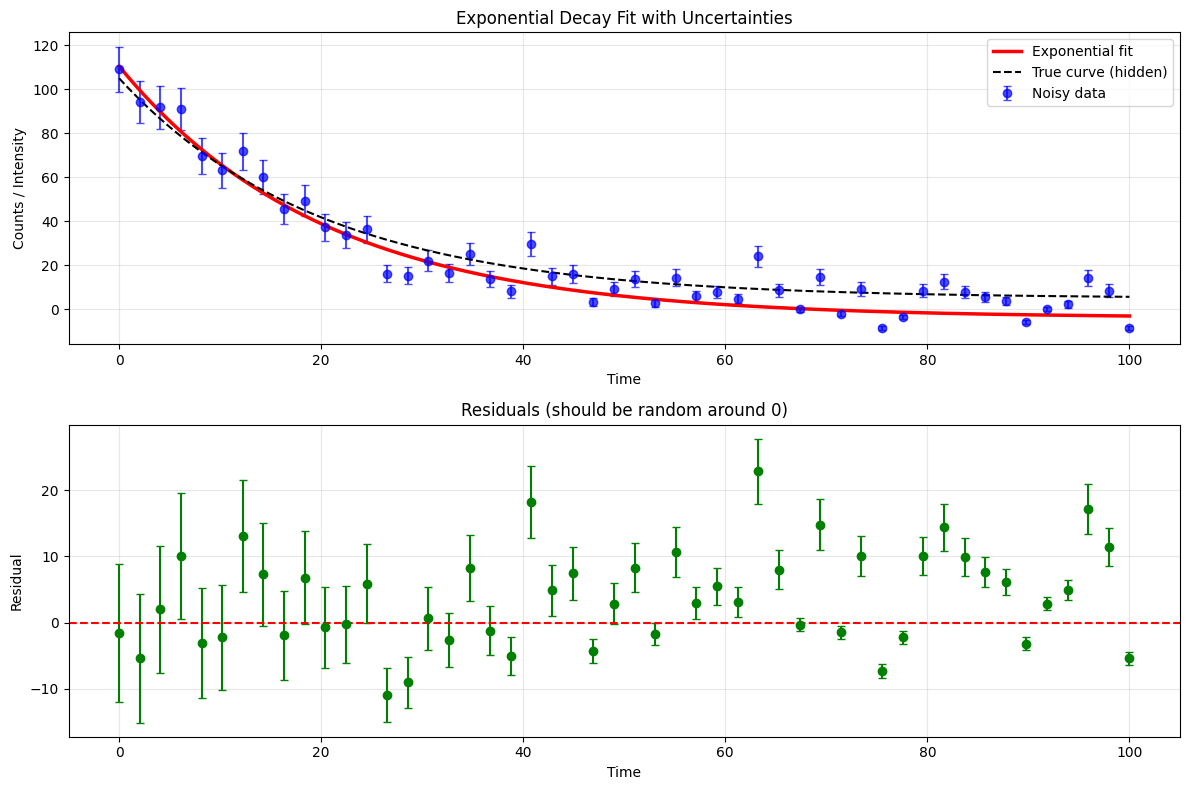

In [11]:
# smooth curve for plotting
t_smooth = np.linspace(0, 100, 500)
y_fit = exp_decay(t_smooth, *popt)

plt.figure(figsize=(12, 8))

# Main plot
plt.subplot(2,1,1)
plt.errorbar(t_data, y_data, yerr=sigma_data, fmt='o', color='blue', label='Noisy data', capsize=3, alpha=0.7)
plt.plot(t_smooth, y_fit, 'r-', lw=2.5, label='Exponential fit')
plt.plot(t_smooth, exp_decay(t_smooth, N0_true, lambda_true, bg_true), 'k--', lw=1.5, label='True curve (hidden)')
plt.title('Exponential Decay Fit with Uncertainties')
plt.xlabel('Time')
plt.ylabel('Counts / Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals
residuals = y_data - exp_decay(t_data, *popt)
plt.subplot(2,1,2)
plt.errorbar(t_data, residuals, yerr=sigma_data, fmt='o', color='green', label='Residuals', capsize=3)
plt.axhline(0, color='red', linestyle='--', lw=1.5)
plt.title('Residuals (should be random around 0)')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
chi2 = np.sum((residuals / sigma_data)**2)
dof = len(t_data) - len(popt)
reduced_chi2 = chi2 / dof
print(f"Reduced χ² = {reduced_chi2:.2f}  (≈1 is good fit)")

Reduced χ² = 7.27  (≈1 is good fit)
